In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Pregnancies	Glucose	BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age	Outcome

number_of_pregnancy Number of times pregnant.
glucose Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
blood_pressure Diastolic blood pressure (mm Hg).
skin_thickness Triceps skinfold thickness (mm).
insulin 2-Hour serum insulin (mu U/ml).
bmi  Body mass index (weight in kg/(height in m)^2).
diabetes_pedigree Diabetes pedigree function.
age  Age (years).
outcome  Class variable (0 or 1).
"""

file_name='pima.txt';
column_names = ['number_of_pregnancy', 'glucose', 'blood_pressure','skin_thickness','insulin','bmi','diabetes_pedigree','age','outcome']


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import mstats
from sklearn import preprocessing


def fn_calc_mean(dfx,col_name):
    df_tmp = dfx[dfx[col_name]>0]
    return df_tmp[col_name].mean()


df = pd.read_csv(file_name,sep='\t',names=column_names);

df2 = df;


Histogram

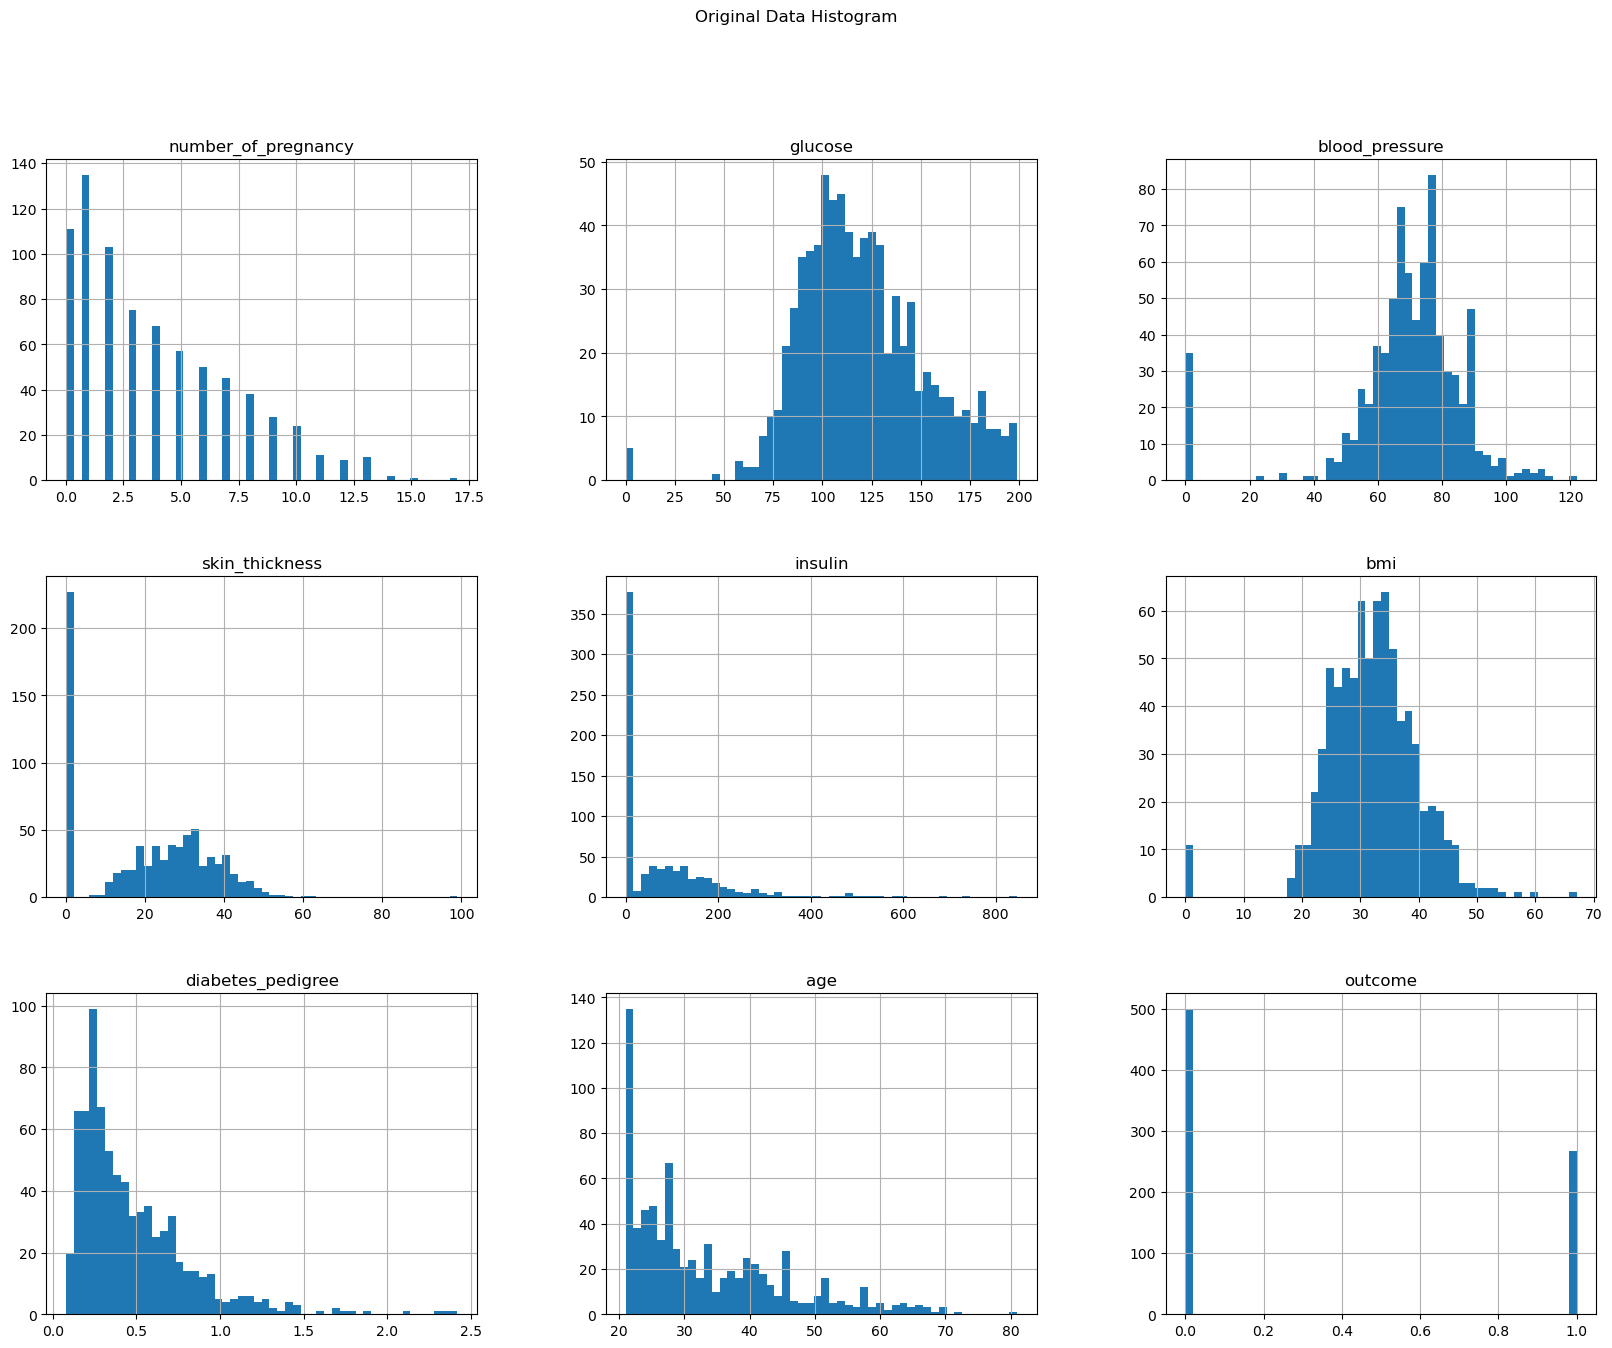

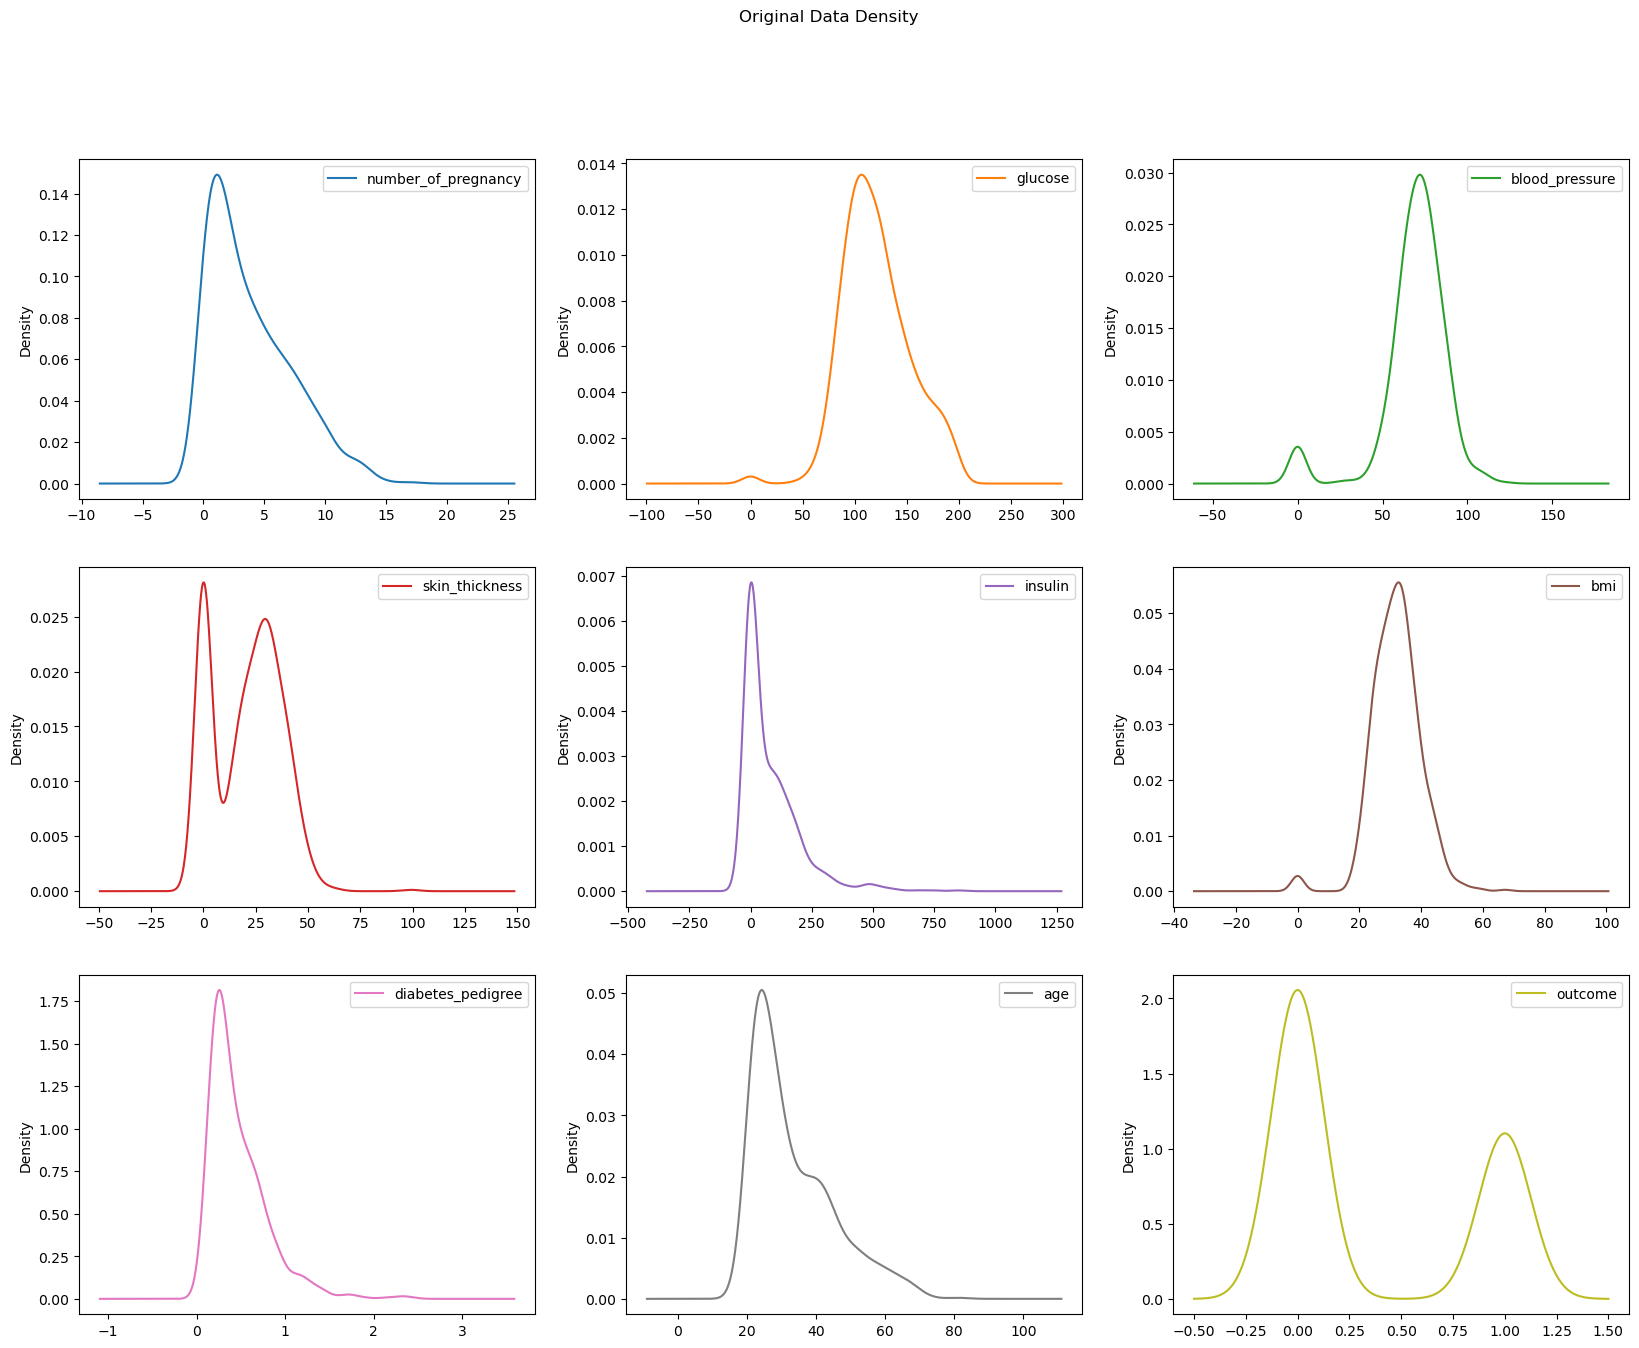

In [2]:
df2.hist(bins=50, figsize=(20, 15))
plt.suptitle("Original Data Histogram")
plt.show()

df2.plot(kind='density', subplots=True, layout=(3,3), figsize=(20, 15), sharex=False,title="Original Data Density")
plt.show()

In [3]:

df_normal = df2[df2['outcome']==0]
df_diabetes = df2[df2['outcome']==1]

naValues = ["glucose", "blood_pressure", "skin_thickness", "insulin", "age","bmi","diabetes_pedigree" ]
for i in naValues:
    # Normal olanlarda 0'ları dolduralım
    ortalama = fn_calc_mean(df_normal, i)
    ortalama2 = fn_calc_mean(df_diabetes, i)
    if (i=="bmi") | (i=="diabetes_pedigree"):
        df2.loc[(df2[i] == 0) & (df2['outcome']==0), i] = ortalama
        df2.loc[(df2[i] == 0) & (df2['outcome']==1), i] = ortalama2
    else:
        df2.loc[(df2[i] == 0) & (df2['outcome']==0), i] = int(ortalama)
        df2.loc[(df2[i] == 0) & (df2['outcome']==1), i] = int(ortalama2)
    
    df2[i] = mstats.winsorize(df2[i], limits=[0.05, 0.05])
    

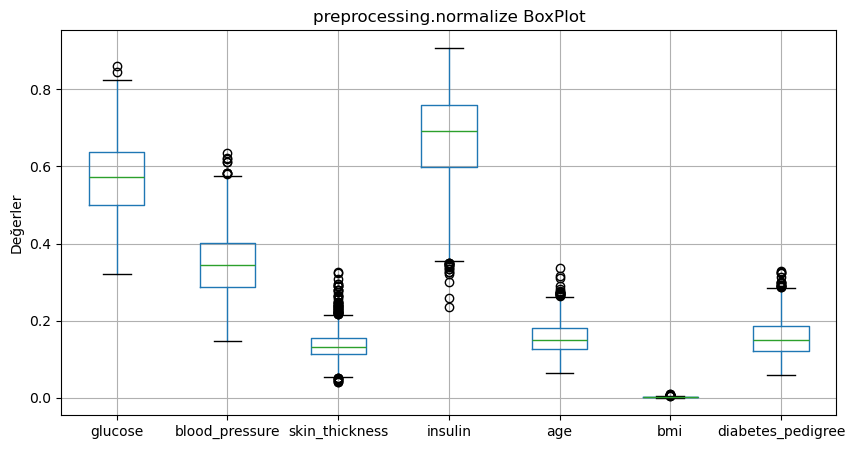

In [4]:

df_n = pd.DataFrame(preprocessing.normalize(df2),columns=["number_of_pregnancy","glucose", "blood_pressure", "skin_thickness", "insulin", "age","bmi","diabetes_pedigree","outcome"])


fig = plt.figure(figsize =(10, 5))

# 'KolonAdı' isimli kolona göre boxplot çizelim
df_n.boxplot(column=["glucose", "blood_pressure", "skin_thickness", "insulin", "age","bmi","diabetes_pedigree" ])

# Grafik başlığı ekleyelim
plt.title('preprocessing.normalize BoxPlot')

# Y ekseni etiketi
plt.ylabel('Değerler')

# Görseli gösterelim
plt.show()


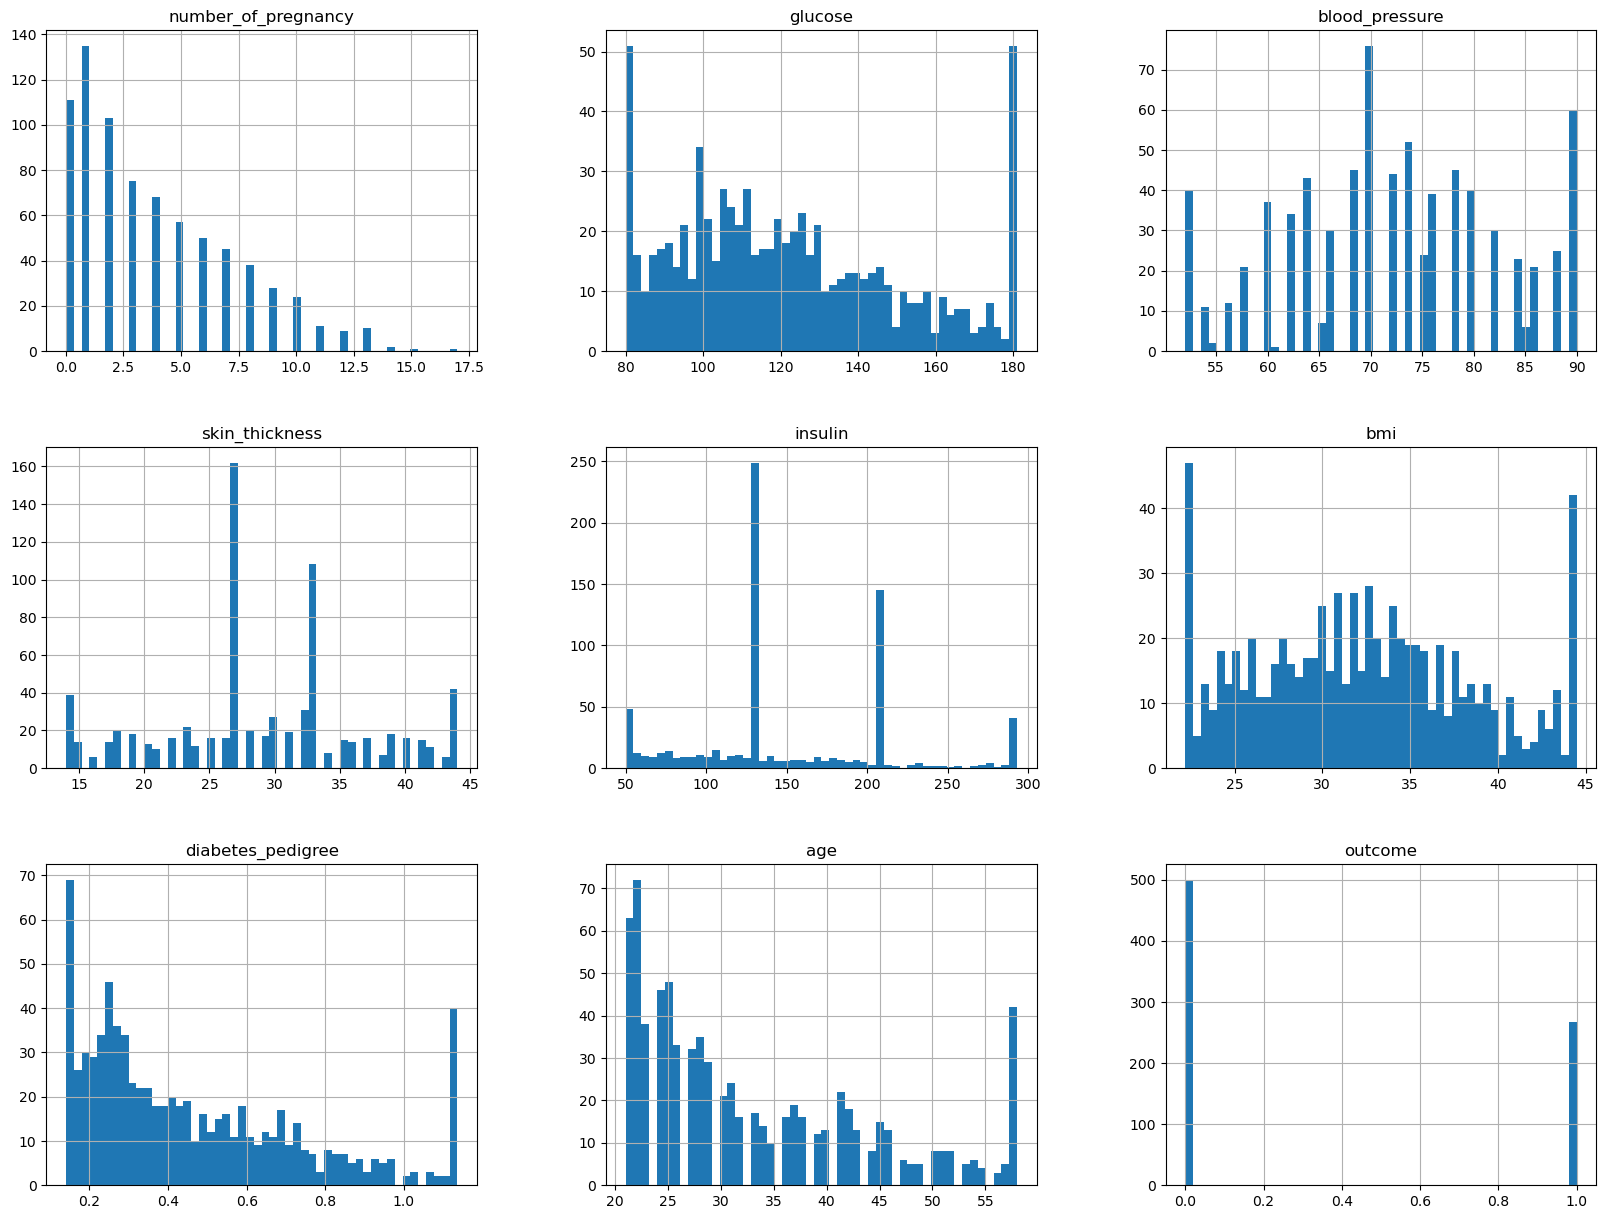

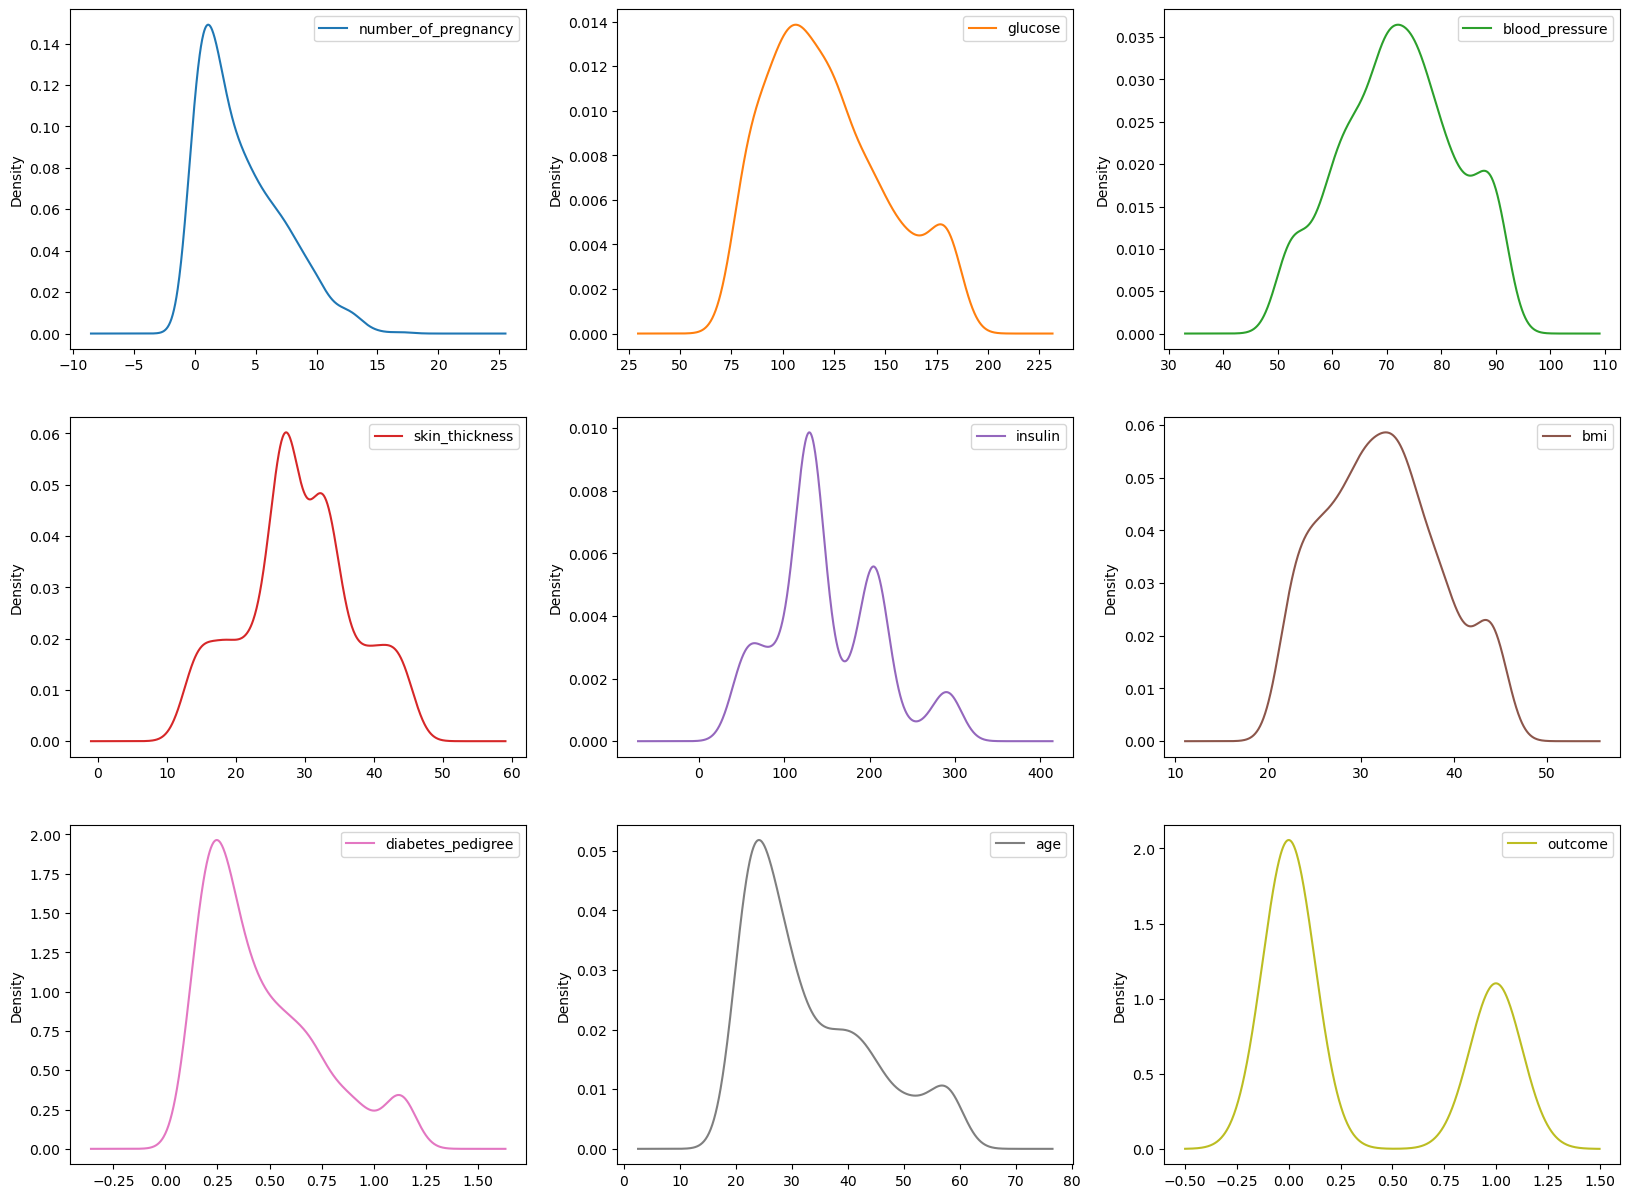

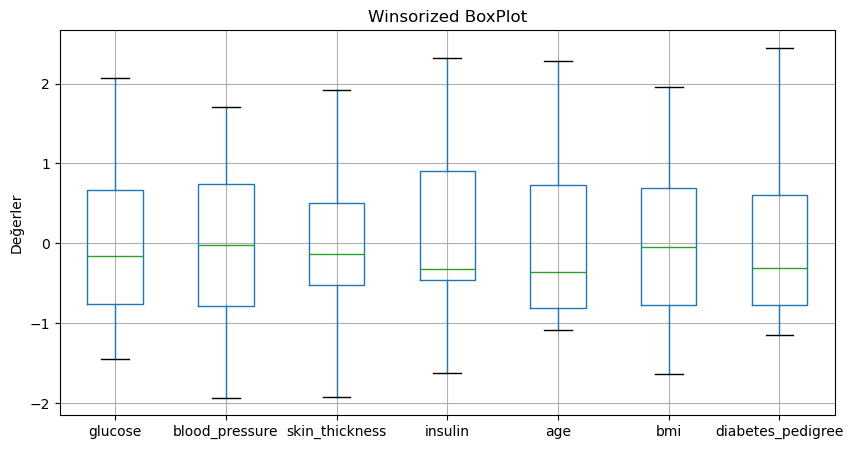

In [5]:


# Histogram
df2.hist(bins=50, figsize=(20, 15))
plt.show()

df2.plot(kind='density', subplots=True, layout=(3,3), figsize=(20, 15), sharex=False)
plt.show()


scaler = StandardScaler()

# DataFrame'i ölçeklendirme
df_normalized = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)

fig = plt.figure(figsize =(10, 5))

# 'KolonAdı' isimli kolona göre boxplot çizelim
df_normalized.boxplot(column=["glucose", "blood_pressure", "skin_thickness", "insulin", "age","bmi","diabetes_pedigree" ])

# Grafik başlığı ekleyelim
plt.title('Winsorized BoxPlot')

# Y ekseni etiketi
plt.ylabel('Değerler')

# Görseli gösterelim
plt.show()



y = df2.outcome
X = df_normalized.drop('outcome',axis=1)



# VERİ ÖN İŞLEME BİTTİ MODELLERİ OLUŞTURUYORUZ

In [6]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import seaborn as sns


# NAIVE BAYES

In [7]:
from sklearn.naive_bayes import GaussianNB


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

# Naive Bayes modelini oluşturma ve eğitme
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [8]:
# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test)

# Performans metriklerini yazdırın
print("NAIVE BAYES Accuracy:", accuracy_score(y_test, y_pred))
print("NAIVE BAYES Classification Report:")
print(classification_report(y_test, y_pred))

NAIVE BAYES Accuracy: 0.8051948051948052
NAIVE BAYES Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       150
           1       0.70      0.77      0.73        81

    accuracy                           0.81       231
   macro avg       0.79      0.80      0.79       231
weighted avg       0.81      0.81      0.81       231



Naive Bayes Confusion Matrix:
 [[124  26]
 [ 19  62]]


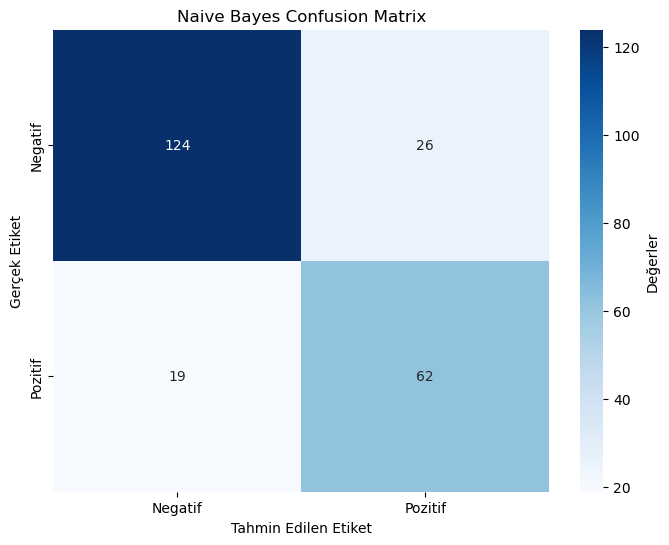

In [9]:
# Confusion Matrix hesaplama
conf_matrix = confusion_matrix(y_test, y_pred)
print("Naive Bayes Confusion Matrix:\n", conf_matrix)

# Confusion matrix çiz
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', 
                 xticklabels=['Negatif', 'Pozitif'], yticklabels=['Negatif', 'Pozitif'],
                 cbar_kws={'label': 'Değerler'})

plt.ylabel('Gerçek Etiket')
plt.xlabel('Tahmin Edilen Etiket')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

NAIVE BAYES ROC AUC: 0.8734156378600823


<Figure size 800x600 with 0 Axes>

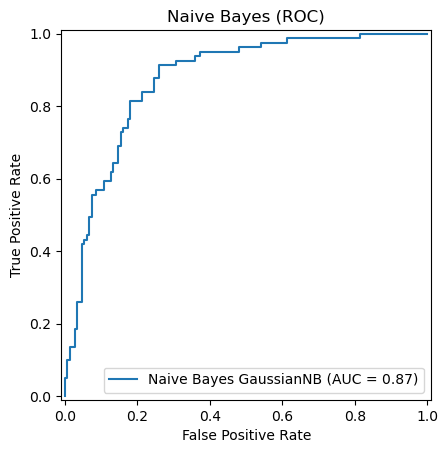

In [10]:
######### ROC Eğrisi

# Tahmin olasılıklarını al (pozitif sınıf için)
y_scores = model.predict_proba(X_test)[:, 1]

# ROC eğrisi için TPR, FPR değerlerini hesaplama
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# AUC değerini hesaplama
roc_auc = auc(fpr, tpr)
print("NAIVE BAYES ROC AUC:", roc_auc)

# ROC Eğrisi çizimi
plt.figure(figsize=(8, 6))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Naive Bayes GaussianNB').plot()
plt.title('Naive Bayes (ROC)')
plt.show()

########################################

# KNN

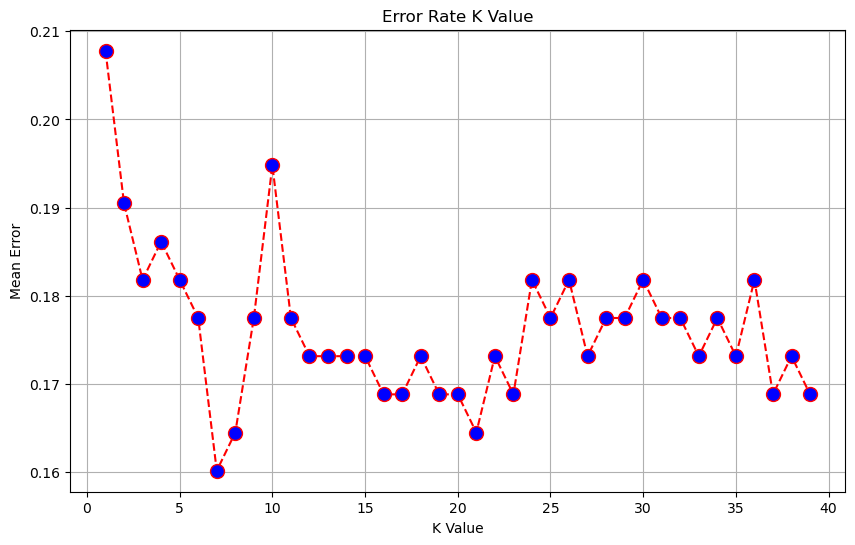

In [11]:
from sklearn.neighbors import KNeighborsClassifier

error_rates = []
k_values = range(1, 40)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(error_rate)

# Hata oranı grafiğini çizdirin
plt.figure(figsize=(10, 6))
plt.plot(k_values, error_rates, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.grid(True)
plt.show()

In [12]:

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

# Performans metrikleri
print("KNN K-7 Accuracy:", accuracy_score(y_test, y_pred))
print("KNN K-7 Classification Report:")
print(classification_report(y_test, y_pred))

KNN K-7 Accuracy: 0.8398268398268398
KNN K-7 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       150
           1       0.81      0.72      0.76        81

    accuracy                           0.84       231
   macro avg       0.83      0.81      0.82       231
weighted avg       0.84      0.84      0.84       231



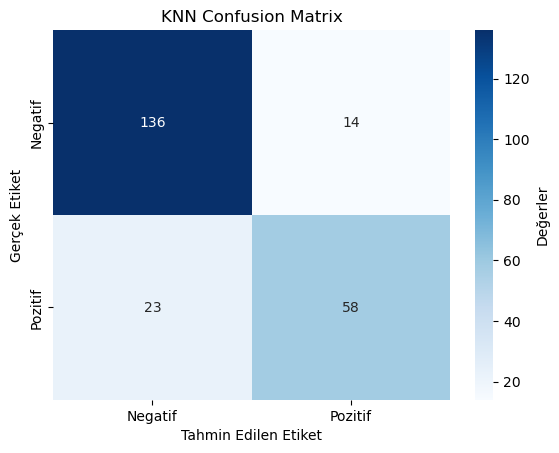

In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', 
                 xticklabels=['Negatif', 'Pozitif'], yticklabels=['Negatif', 'Pozitif'],
                 cbar_kws={'label': 'Değerler'})

plt.ylabel('Gerçek Etiket')
plt.xlabel('Tahmin Edilen Etiket')
plt.title('KNN Confusion Matrix')
plt.show()

KNN ROC AUC: 0.8894650205761316


<Figure size 1000x800 with 0 Axes>

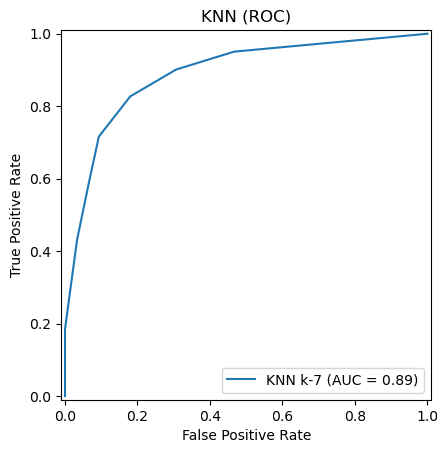

In [14]:
# Tahmin olasılıklarını al (pozitif sınıf için)
y_scores = knn.predict_proba(X_test)[:, 1]

# ROC eğrisi için TPR, FPR değerlerini hesaplama
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# AUC değerini hesaplama
roc_auc = auc(fpr, tpr)
print("KNN ROC AUC:", roc_auc)

# ROC Eğrisi çizimi
plt.figure(figsize=(10, 8))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='KNN k-7').plot()
plt.title('KNN (ROC)')
plt.show()

# MLP

In [15]:
from sklearn.neural_network import MLPClassifier 

model = MLPClassifier(hidden_layer_sizes=(64,32,2),activation="relu",random_state=42).fit(X_train, y_train)
y_pred=model.predict(X_test)

# Performans metrikleri
print("MLP Accuracy:", accuracy_score(y_test, y_pred))
print("MLP Classification Report:")
print(classification_report(y_test, y_pred))

MLP Accuracy: 0.8311688311688312
MLP Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       150
           1       0.79      0.70      0.75        81

    accuracy                           0.83       231
   macro avg       0.82      0.80      0.81       231
weighted avg       0.83      0.83      0.83       231



/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Confusion Matrix:
 [[135  15]
 [ 24  57]]


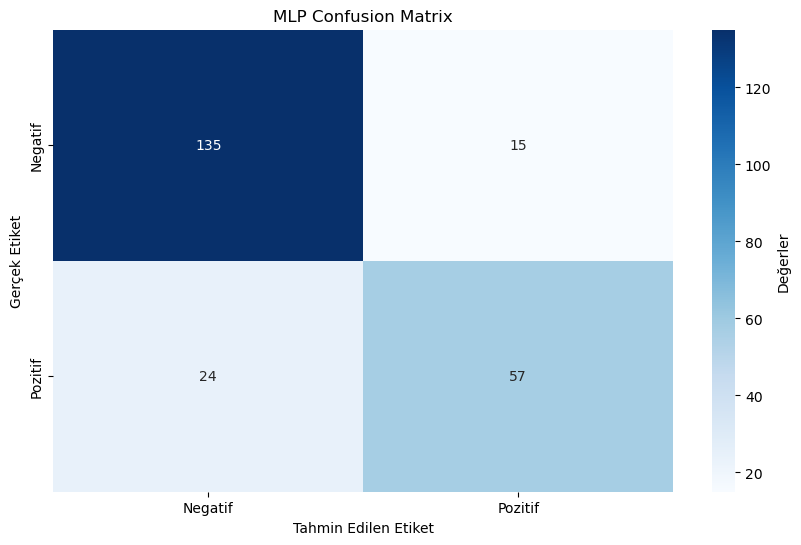

In [16]:
# Confusion Matrix hesaplama
conf_matrix = confusion_matrix(y_test, y_pred)
print("MLP Confusion Matrix:\n", conf_matrix)

# Confusion matrix çiz
plt.figure(figsize=(10, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', 
                 xticklabels=['Negatif', 'Pozitif'], yticklabels=['Negatif', 'Pozitif'],
                 cbar_kws={'label': 'Değerler'})

plt.ylabel('Gerçek Etiket')
plt.xlabel('Tahmin Edilen Etiket')
plt.title('MLP Confusion Matrix')
plt.show()

MLP ROC AUC: 0.8944855967078189


<Figure size 1000x800 with 0 Axes>

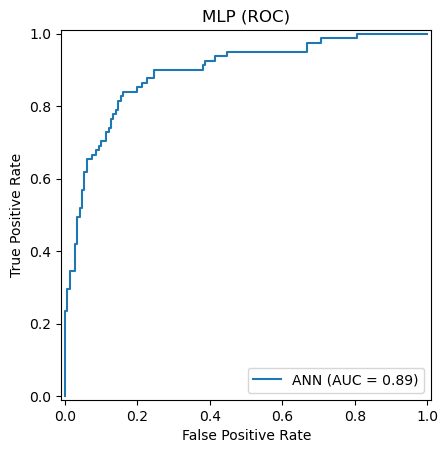

In [17]:

# Tahmin olasılıkları(pozitif sınıf için)
y_scores = model.predict_proba(X_test)[:, 1]

# ROC eğrisi için TPR, FPR değerlerini hesaplama
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# AUC değerini hesaplama
roc_auc = auc(fpr, tpr)
print("MLP ROC AUC:", roc_auc)


# ROC Eğrisi çizimi
plt.figure(figsize=(10, 8))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ANN').plot()
plt.title('MLP (ROC)')
plt.show()

# SVM - kernel=linear

In [18]:
from sklearn import svm
svm_kernel='linear'

model_svm = svm.SVC(kernel=svm_kernel)

model_svm.fit(X_train, y_train)

y_pred = model_svm.predict(X_test)

# Performans metriklerini yazdırın
print("SVM "+svm_kernel+" kernel Accuracy:", accuracy_score(y_test, y_pred))
print("SVM "+svm_kernel+" Classification Report:")
print(classification_report(y_test, y_pred))

SVM linear kernel Accuracy: 0.8571428571428571
SVM linear Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       150
           1       0.77      0.84      0.80        81

    accuracy                           0.86       231
   macro avg       0.84      0.85      0.85       231
weighted avg       0.86      0.86      0.86       231



SVM linear kernel Confusion Matrix:
 [[130  20]
 [ 13  68]]


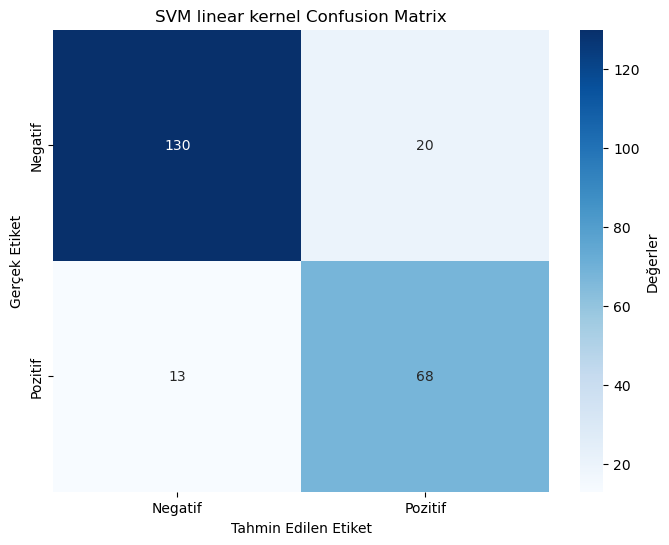

In [19]:
# Confusion Matrix hesaplama
conf_matrix = confusion_matrix(y_test, y_pred)
print("SVM "+svm_kernel+" kernel Confusion Matrix:\n", conf_matrix)

# Confusion matrix çiz
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', 
                 xticklabels=['Negatif', 'Pozitif'], yticklabels=['Negatif', 'Pozitif'],
                 cbar_kws={'label': 'Değerler'})



plt.ylabel('Gerçek Etiket')
plt.xlabel('Tahmin Edilen Etiket')
plt.title('SVM '+svm_kernel+' kernel Confusion Matrix')
plt.show()

# SVM - kernel=rbf

In [20]:
svm_kernel='rbf'

model_svm = svm.SVC(kernel=svm_kernel)

model_svm.fit(X_train, y_train)

y_pred = model_svm.predict(X_test)

# Performans metriklerini yazdırın
print("SVM "+svm_kernel+" kernel Accuracy:", accuracy_score(y_test, y_pred))
print("SVM "+svm_kernel+" Classification Report:")
print(classification_report(y_test, y_pred))

SVM rbf kernel Accuracy: 0.8441558441558441
SVM rbf Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       150
           1       0.78      0.78      0.78        81

    accuracy                           0.84       231
   macro avg       0.83      0.83      0.83       231
weighted avg       0.84      0.84      0.84       231



SVM rbf kernel Confusion Matrix:
 [[132  18]
 [ 18  63]]


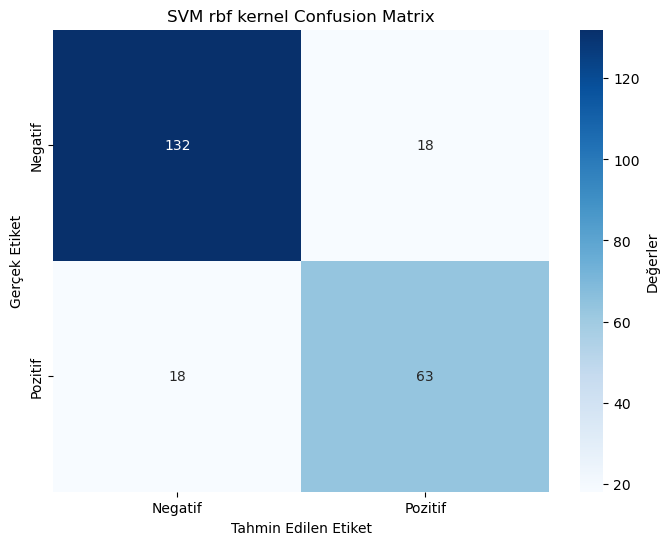

In [21]:
# Confusion Matrix hesaplama
conf_matrix = confusion_matrix(y_test, y_pred)
print("SVM "+svm_kernel+" kernel Confusion Matrix:\n", conf_matrix)

# Confusion matrix çiz
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', 
                 xticklabels=['Negatif', 'Pozitif'], yticklabels=['Negatif', 'Pozitif'],
                 cbar_kws={'label': 'Değerler'})



plt.ylabel('Gerçek Etiket')
plt.xlabel('Tahmin Edilen Etiket')
plt.title('SVM '+svm_kernel+' kernel Confusion Matrix')
plt.show()

# SVM - kernel=poly, degree=3

In [22]:
svm_kernel='poly'

model_svm = svm.SVC(kernel=svm_kernel,degree=3)

model_svm.fit(X_train, y_train)

y_pred = model_svm.predict(X_test)

# Performans metriklerini yazdırın
print("SVM "+svm_kernel+" kernel Accuracy:", accuracy_score(y_test, y_pred))
print("SVM "+svm_kernel+" Classification Report:")
print(classification_report(y_test, y_pred))

SVM poly kernel Accuracy: 0.7748917748917749
SVM poly Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       150
           1       0.73      0.57      0.64        81

    accuracy                           0.77       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231



SVM poly kernel Confusion Matrix:
 [[133  17]
 [ 35  46]]


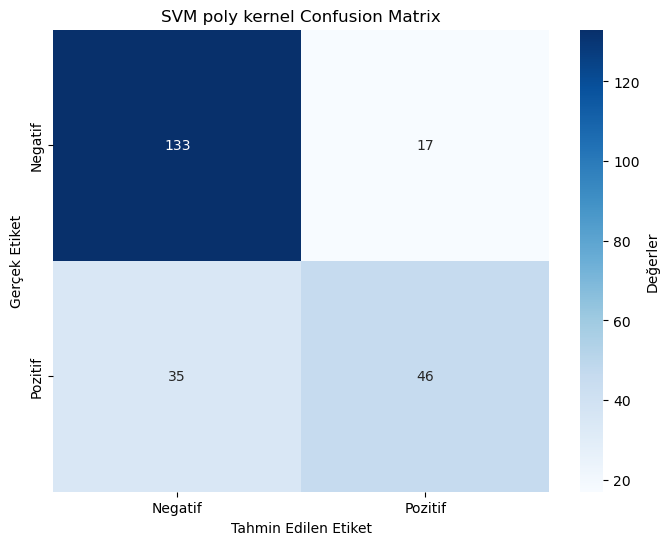

In [23]:
# Confusion Matrix hesaplama
conf_matrix = confusion_matrix(y_test, y_pred)
print("SVM "+svm_kernel+" kernel Confusion Matrix:\n", conf_matrix)

# Confusion matrix çiz
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', 
                 xticklabels=['Negatif', 'Pozitif'], yticklabels=['Negatif', 'Pozitif'],
                 cbar_kws={'label': 'Değerler'})



plt.ylabel('Gerçek Etiket')
plt.xlabel('Tahmin Edilen Etiket')
plt.title('SVM '+svm_kernel+' kernel Confusion Matrix')
plt.show()